In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# download a file from a URL
origin='http://reed.cs.depaul.edu/peterh/Essays/Metro_Interstate_reduced.csv'


In [ ]:
# load the data into pandas
df_metro = pd.read_csv(origin, parse_dates=['date_time'], na_values=['nan', 'NaN'])

In [ ]:
date_time = pd.to_datetime(df_metro.pop('date_time'), format='%d.%m.%Y %H:%M:%S')
date_time

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
40570   2018-09-30 19:00:00
40571   2018-09-30 20:00:00
40572   2018-09-30 21:00:00
40573   2018-09-30 22:00:00
40574   2018-09-30 23:00:00
Name: date_time, Length: 40575, dtype: datetime64[ns]

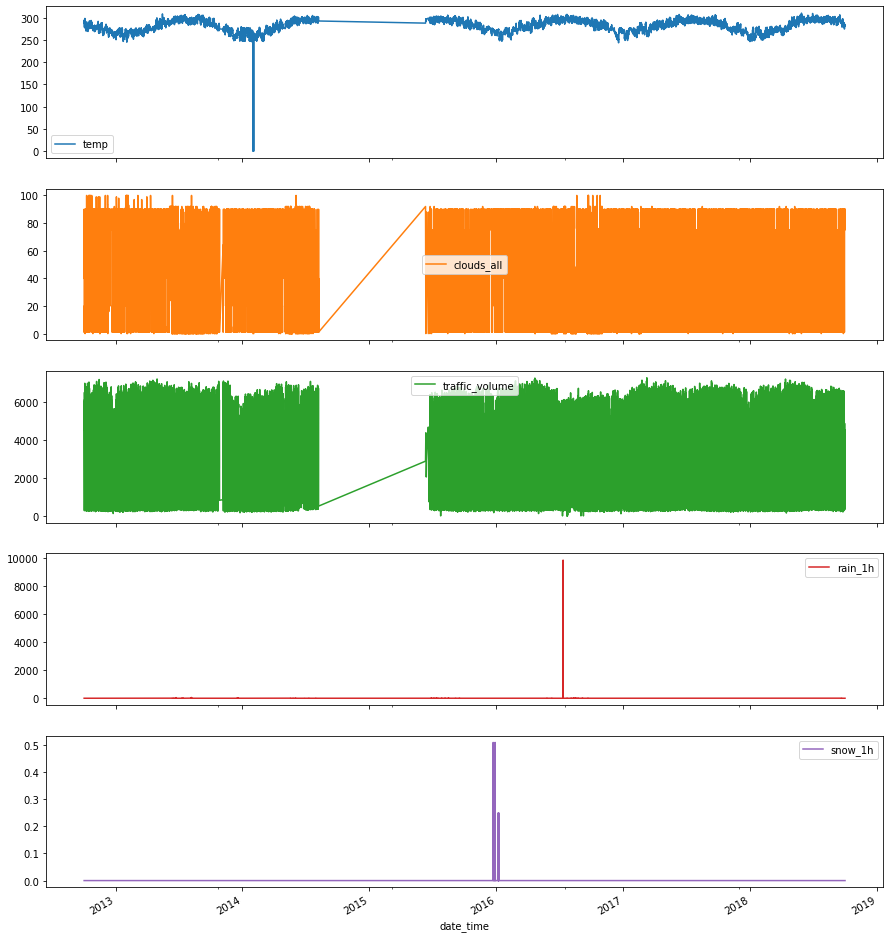

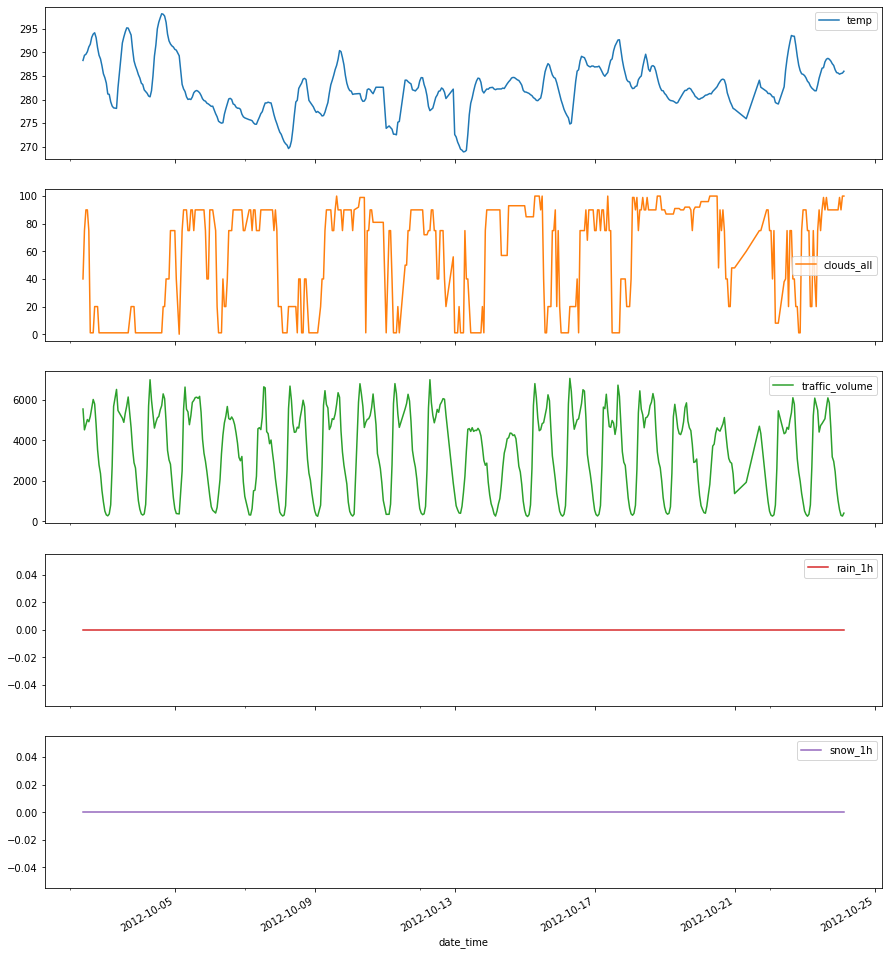

In [ ]:
# Selecting the fields of interest
subSelectedColumns = ['temp', 'clouds_all','traffic_volume', 'rain_1h', 'snow_1h']
plotFeatures = df_metro[subSelectedColumns]
plotFeatures.index = date_time
_ = plotFeatures.plot(subplots=True, figsize=(15,18))


# sub select the features of interest and create a sub set data frame with the first 480 records
plotFeatures = df_metro[subSelectedColumns][:480]
# reindex the data frame
plotFeatures.index = date_time[:480]
_ = plotFeatures.plot(subplots=True, figsize=(15,18))

In [ ]:
# let's determine if there are any missing values
df_metro.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [ ]:
# unique values of each numerical attribute value
dfColumns=[]
for col in  df_metro.columns:
  dfColumns.append([col, df_metro[col].nunique(), df_metro[col].drop_duplicates().values])
pd.DataFrame(dfColumns, columns=['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,holiday,12,"[None, Columbus Day, Veterans Day, Thanksgivin..."
1,temp,5841,"[288.28, 289.36, 289.58, 290.13, 291.14, 291.7..."
2,rain_1h,372,"[0.0, 0.25, 0.57, 0.38, 0.3, 0.29, 0.44, 0.36,..."
3,snow_1h,12,"[0.0, 0.51, 0.32, 0.06, 0.05, 0.21, 0.25, 0.44..."
4,clouds_all,60,"[40, 75, 90, 1, 20, 0, 100, 92, 99, 81, 50, 72..."
5,weather_main,11,"[Clouds, Clear, Rain, Drizzle, Mist, Fog, Thun..."
6,weather_description,35,"[scattered clouds, broken clouds, overcast clo..."
7,traffic_volume,6704,"[5545, 4516, 4767, 5026, 4918, 5181, 5584, 601..."


In [ ]:
df_metro['holiday'].value_counts()

None                         40522
Columbus Day                     5
Veterans Day                     5
Thanksgiving Day                 5
Christmas Day                    5
New Years Day                    5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Labor Day                        5
Martin Luther King Jr Day        3
Name: holiday, dtype: int64

In [ ]:
df_metro['date_time'] = date_time

In [ ]:
df_metro.info

<bound method DataFrame.info of       holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
40570    None  283.45      0.0      0.0          75        Clouds   
40571    None  282.76      0.0      0.0          90        Clouds   
40572    None  282.73      0.0      0.0          90  Thunderstorm   
40573    None  282.09      0.0      0.0          90        Clouds   
40574    None  282.12      0.0      0.0          90        Clouds   

          weather_description  traffic_volume           date_time  
0            scattered clouds            5545 2012-10-02 09:00:00  
1  

In [ ]:
# To get summary statistics on object columns
# here i am including non numeric data types
df_metro.describe(include=object)

,holiday,weather_main,weather_description
count,40575,40575,40575
unique,12,11,35
top,None,Clouds,sky is clear
freq,40522,15123,11642


In [ ]:
# we inspect the types of the  data set
df_metro.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
traffic_volume                  int64
date_time              datetime64[ns]
dtype: object

In [ ]:
# summarizes the types of columns
df_metro.dtypes.value_counts()

object            3
float64           3
int64             2
datetime64[ns]    1
dtype: int64

In [ ]:
# summarizing the weather desciprition column
df_metro['weather_description'].value_counts()

sky is clear                           11642
overcast clouds                         5072
broken clouds                           4650
scattered clouds                        3451
mist                                    3069
light rain                              2831
few clouds                              1950
Sky is Clear                            1724
light snow                              1588
moderate rain                           1379
haze                                     766
heavy snow                               500
heavy intensity rain                     408
light intensity drizzle                  360
proximity thunderstorm                   339
fog                                      201
snow                                     192
drizzle                                  138
proximity shower rain                    120
thunderstorm                              59
thunderstorm with light rain              23
very heavy rain                           18
heavy inte

In [ ]:
## We have alot of desciptions so we look at the top 10 and group the rest into one bucket.

In [ ]:
top_n = df_metro['weather_description'].value_counts().index[:10]
(
    df_metro.assign(
    weather_description = df_metro['weather_description'].where(df_metro['weather_description'].isin(top_n), "Other Weather descriptions"
                                                        )
    ).weather_description.value_counts()
)

sky is clear                  11642
overcast clouds                5072
broken clouds                  4650
scattered clouds               3451
Other Weather descriptions     3219
mist                           3069
light rain                     2831
few clouds                     1950
Sky is Clear                   1724
light snow                     1588
moderate rain                  1379
Name: weather_description, dtype: int64

In [ ]:
import seaborn as sns

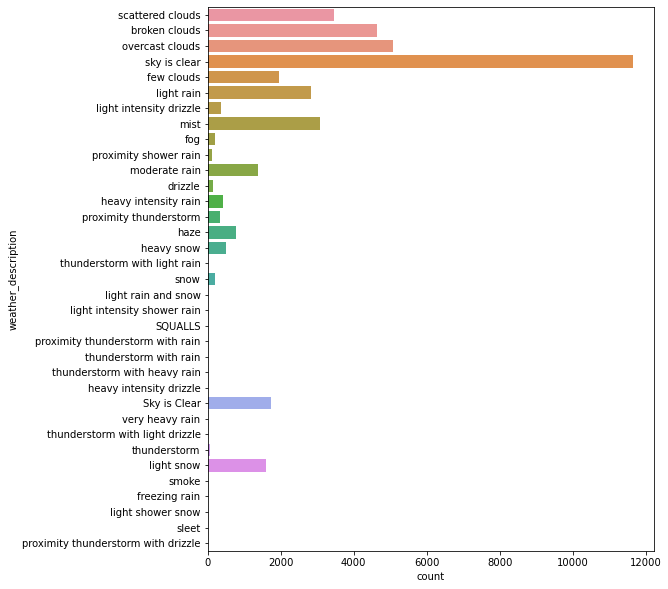

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
top_n = df_metro['weather_description'].value_counts().index[:10]
sns.countplot(
    y=df_metro['weather_description'],
    data = (
    df_metro.assign(
    weather_description = df_metro['weather_description'].where(df_metro['weather_description'].isin(top_n), "Other Weather descriptions"
                                                        )
    ).weather_description.value_counts()
)
)
plt.show()

In [ ]:
df_metro['weather_main'].value_counts()

Clouds          15123
Clear           13366
Rain             4769
Mist             3069
Snow             2297
Haze              766
Drizzle           515
Thunderstorm      453
Fog               201
Smoke              15
Squall              1
Name: weather_main, dtype: int64

Here we see the distribution of these decriptions in our data set

34

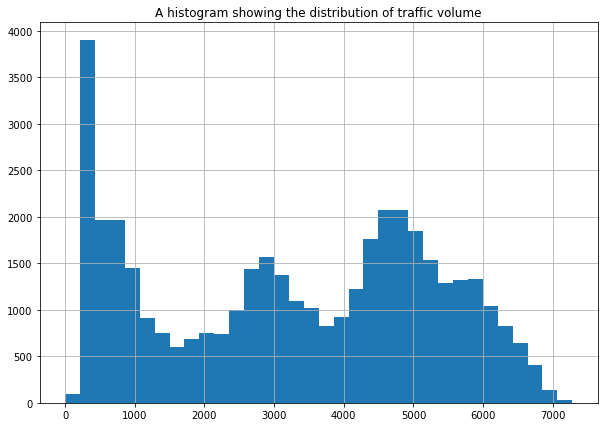

In [ ]:
# using pandas to plot a histogram 
fig, ax = plt.subplots(figsize=(10, 7))
df_metro['traffic_volume'].hist(ax=ax, bins=bins)
plt.title('A histogram showing the distribution of traffic volume')
plt.show()


In [ ]:
df_metro.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,40575.0,281.316763,13.816618,0.0,271.84,282.86,292.28,310.07
rain_1h,40575.0,0.318632,48.812640,0.0,0.00,0.00,0.00,9831.30
snow_1h,40575.0,0.000117,0.005676,0.0,0.00,0.00,0.00,0.51
clouds_all,40575.0,44.199162,38.683447,0.0,1.00,40.00,90.00,100.00
traffic_volume,40575.0,3290.650474,1984.772909,0.0,1248.50,3427.00,4952.00,7280.00


In [ ]:
# we use Kolmogorov-Smirnov test to determine the distribution is normal.
# provides us with a p-valu
# if the value is signficant ( < 0.05), then the data is not normal
from scipy import stats
stats.kstest(df_metro['traffic_volume'], cdf='norm')

KstestResult(statistic=0.999531444710104, pvalue=0.0)

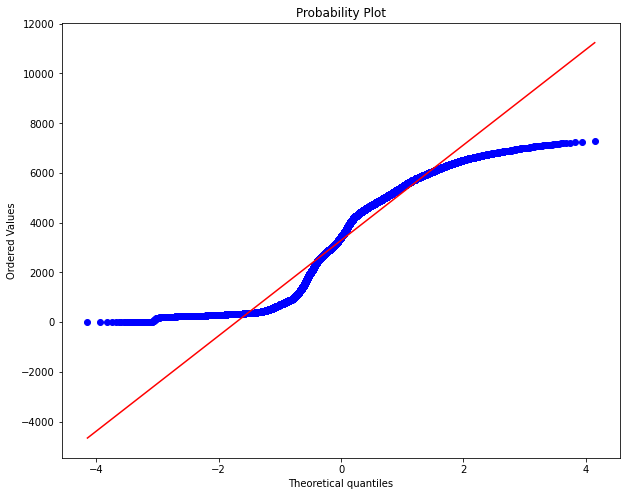

We plotted a probability plot to determine if the data is normal and the we see that the values are off the trackline 

Clouds          15123
Clear           13366
Rain             4769
Mist             3069
Snow             2297
Haze              766
Drizzle           515
Thunderstorm      453
Fog               201
Smoke              15
Squall              1
Name: weather_main, dtype: int64

Lets's compare the traffic volume across weather main

In [ ]:
# createa mask for the different kinds of weather 
weather_mask = df_metro['weather_main'].isin(['Rain', 'Snow', 'Fog', 'Smoke', 'Mist', 'Clouds'])

In [ ]:
# we use a groupby method to look at the mean and standrd deviation for traffic volume for each of the group of weather
df_metro[weather_mask].groupby('weather_main').traffic_volume.agg(['mean', 'std'])

,mean,std
weather_main,,
Clouds,3616.988230,1906.836777
Fog,2724.442786,2308.840663
Mist,2854.214076,2158.628973
Rain,3355.270287,1978.814253
Smoke,2559.666667,1786.344658
Snow,3001.861123,1898.664631


In [ ]:
# let's visualize the traffic_volumne for each weather main category

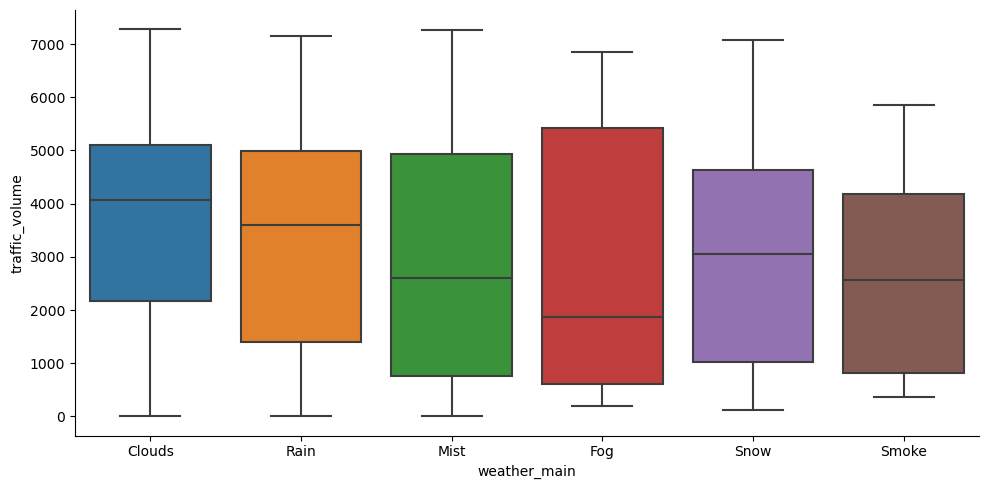

In [ ]:
weather_main_graph = sns.catplot(
    x='weather_main', y='traffic_volume', data=df_metro[weather_mask], kind='box', height = 5, aspect=2.0
)
weather_main_graph.fig.set_dpi(100)

Here see that on Fog and Mist days, there is less traffic

deriving time series for traffic volume

In [ ]:
# lets create a copy of the data frame
df_metro_date_time_traffic_volume = df_metro.copy()

In [ ]:
df_metro_date_time_traffic_volume['trafficDate'] = pd.to_datetime(df_metro_date_time_traffic_volume['date_time']).dt.date
df_metro_date_time_traffic_volume.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date_time,trafficDate
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02 09:00:00,2012-10-02
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02 10:00:00,2012-10-02
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02 11:00:00,2012-10-02
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02 12:00:00,2012-10-02
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02 13:00:00,2012-10-02


In [ ]:
# let's drop the uncessary columns
df_metro_date_time_traffic_volume.drop(columns=['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time'], inplace=True)

In [ ]:
# we use a groupby method to look at the mean  for traffic volume for each of the days
traffic_volumne_mean_df = df_metro_date_time_traffic_volume.groupby('trafficDate').traffic_volume.agg(['mean'])

<Figure size 720x576 with 0 Axes>

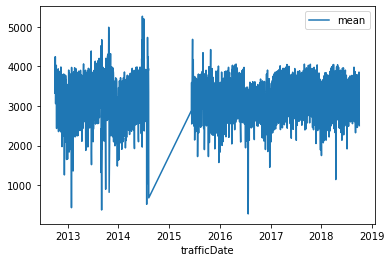

In [ ]:
plt.figure(figsize=(10, 8))
traffic_volumne_mean_df.plot()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1860,) and (1,)

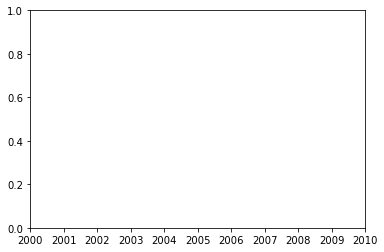

In [ ]:
import numpy as np
plt.plot(traffic_volumne_mean_df.index, traffic_volumne_mean_df.mean)
plt.show()

In [ ]:
traffic_volumne_mean_df

,mean
trafficDate,
2012-10-02,4219.266667
2012-10-03,3317.250000
2012-10-04,3747.458333
2012-10-05,4242.545455
2012-10-06,3256.956522
...,...
2018-09-26,3692.791667
2018-09-27,3660.208333
2018-09-28,3854.916667


In [ ]:
df_metro_date_time_traffic_volume

,traffic_volume,date_time
date_time,,
2012-10-02 09:00:00,5545,2012-10-02 09:00:00
2012-10-02 10:00:00,4516,2012-10-02 10:00:00
2012-10-02 11:00:00,4767,2012-10-02 11:00:00
2012-10-02 12:00:00,5026,2012-10-02 12:00:00
2012-10-02 13:00:00,4918,2012-10-02 13:00:00
...,...,...
2018-09-30 19:00:00,3543,2018-09-30 19:00:00
2018-09-30 20:00:00,2781,2018-09-30 20:00:00
2018-09-30 21:00:00,2159,2018-09-30 21:00:00
